This chapter introduces a different clustering algorithm - k-means clustering - and its implementation in SciPy. K-means clustering overcomes the biggest drawback of hierarchical clustering that was discussed in the last chapter. As dendrograms are specific to hierarchical clustering, this chapter discusses one method to find the number of clusters before running k-means clustering. The chapter concludes with a discussion on the limitations of k-means clustering and discusses considerations while using this algorithm.

In [8]:
# Import the whiten function
from scipy.cluster.vq import whiten
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
cc_list = [[1.70000000e+01, 4.00000000e+00, 5.09349050e-01, 9.00098454e-02],[2.00000000e+01, 6.00000000e+00, 5.99234177e-01, 1.35014768e-01],[3.50000000e+01, 0.00000000e+00, 1.04865981e+00, 0.00000000e+00],[1.40000000e+01, 0.00000000e+00, 4.19463924e-01, 0.00000000e+00],[3.70000000e+01, 4.00000000e+00, 1.10858323e+00, 9.00098454e-02],[3.30000000e+01, 3.00000000e+00, 9.88736392e-01, 6.75073840e-02],[1.40000000e+01, 1.00000000e+00, 4.19463924e-01, 2.25024613e-02],[3.00000000e+01, 6.00000000e+00, 8.98851266e-01, 1.35014768e-01],[3.50000000e+01, 5.00000000e+00, 1.04865981e+00, 1.12512307e-01],[1.70000000e+01, 4.00000000e+00, 5.09349050e-01, 9.00098454e-02],[1.10000000e+01, 6.00000000e+00, 3.29578797e-01, 1.35014768e-01],[2.10000000e+01, 1.00000000e+01, 6.29195886e-01, 2.25024613e-01],[1.30000000e+01, 8.00000000e+00, 3.89502215e-01, 1.80019691e-01],[1.00000000e+01, 1.00000000e+01, 2.99617089e-01, 2.25024613e-01],[8.10000000e+01, 9.70000000e+01, 2.42689842e+00, 2.18273875e+00],[8.40000000e+01, 9.40000000e+01, 2.51678354e+00, 2.11523137e+00],[8.70000000e+01, 9.90000000e+01, 2.60666867e+00, 2.22774367e+00],[8.30000000e+01, 9.50000000e+01, 2.48682183e+00, 2.13773383e+00],[9.00000000e+01, 9.50000000e+01, 2.69655380e+00, 2.13773383e+00],[9.70000000e+01, 9.70000000e+01, 2.90628576e+00, 2.18273875e+00],[9.40000000e+01, 9.90000000e+01, 2.81640063e+00, 2.22774367e+00],[8.80000000e+01, 9.90000000e+01, 2.63663038e+00, 2.22774367e+00],[8.90000000e+01, 9.40000000e+01, 2.66659209e+00, 2.11523137e+00],[9.30000000e+01, 9.90000000e+01, 2.78643892e+00, 2.22774367e+00],[9.20000000e+01, 9.00000000e+01, 2.75647721e+00, 2.02522152e+00],[8.20000000e+01, 9.80000000e+01, 2.45686013e+00, 2.20524121e+00],[8.10000000e+01, 1.00000000e+02, 2.42689842e+00, 2.25024613e+00],[9.20000000e+01, 9.30000000e+01, 2.75647721e+00, 2.09272890e+00],[9.10000000e+01, 9.80000000e+01, 2.72651551e+00, 2.20524121e+00],[2.20000000e+01, 1.50000000e+01, 6.59157595e-01, 3.37536920e-01],[2.30000000e+01, 1.00000000e+01, 6.89119304e-01, 2.25024613e-01],[2.50000000e+01, 0.00000000e+00, 7.49042721e-01, 0.00000000e+00],[2.50000000e+01, 1.00000000e+01, 7.49042721e-01, 2.25024613e-01],[2.70000000e+01, 7.00000000e+00, 8.08966139e-01, 1.57517229e-01],[1.70000000e+01, 1.70000000e+01, 5.09349050e-01, 3.82541843e-01],[1.70000000e+01, 1.50000000e+01, 5.09349050e-01, 3.37536920e-01]]
comic_con = pd.DataFrame(cc_list, columns=['x_coordinate','y_coordinate','x_scaled','y_scaled'])
fifa = pd.read_csv('../datasets/fifa_18_dataset.csv')
uniform_data = pd.read_csv('../datasets/uniform_data.csv')
mouse = pd.read_csv('../datasets/mouse.csv')

# Scale wage and value
fifa['scaled_aggression'] = whiten(fifa['aggression'])
fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])

# Basics of k-means clustering.

### K-means clustering: first exercise

This exercise will familiarize you with the usage of k-means clustering on a dataset. Let us use the Comic Con dataset and check how k-means clustering works on it.

Recall the two steps of k-means clustering:

    Define cluster centers through kmeans() function. It has two required arguments: observations and number of clusters.
    Assign cluster labels through the vq() function. It has two required arguments: observations and cluster centers.

The data is stored in a pandas DataFrame, `comic_con`. `x_scaled` and `y_scaled` are the column names of the standardized X and Y coordinates of people at a given point in time.

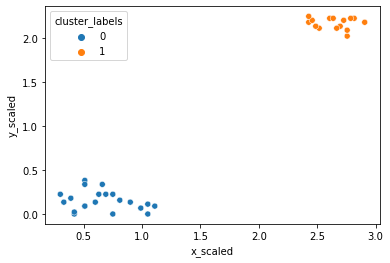

In [9]:
# Import the kmeans and vq functions
from scipy.cluster.vq import vq, kmeans

comic_con_scaled = comic_con[['x_scaled', 'y_scaled']]

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con_scaled,2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con_scaled, cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

# How many clusters?

### Elbow method on distinct clusters

Let us use the comic con data set to see how the elbow plot looks on a data set with distinct, well-defined clusters. You may want to display the data points before proceeding with the exercise.

The data is stored in a pandas DataFrame, `comic_con`. `x_scaled` and `y_scaled` are the column names of the standardized X and Y coordinates of people at a given point in time.

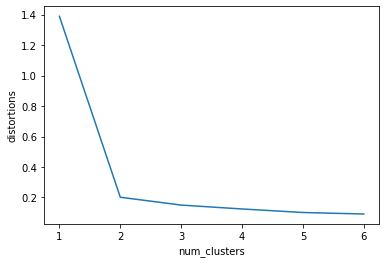

In [10]:
distortions = []
num_clusters = range(1, 7)
comic_con_scaled = comic_con[['x_scaled', 'y_scaled']]

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con_scaled, i)
    distortions.append(distortion)

# Create a DataFrame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

### Elbow method on uniform data

In the earlier exercise, you constructed an elbow plot on data with well-defined clusters. Let us now see how the elbow plot looks on a data set with uniformly distributed points. You may want to display the data points in the IPython Shell before proceeding with the exercise.

The data is stored in a pandas DataFrame, `uniform_data`. `x_scaled` and `y_scaled` are the column names of the standardized X and Y coordinates of points.

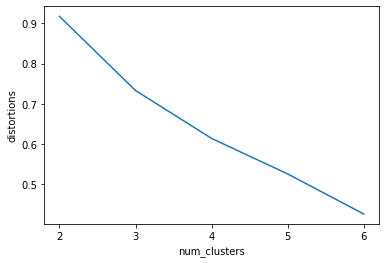

In [11]:
distortions = []
num_clusters = range(2, 7)

uniform_data_scaled = uniform_data[['x_scaled', 'y_scaled']]

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data_scaled, i)
    distortions.append(distortion)

# Create a DataFrame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

# Limitations of k-means clustering

### Impact of seeds on distinct clusters

You noticed the impact of seeds on a dataset that did not have well-defined groups of clusters. In this exercise, you will explore whether seeds impact the clusters in the Comic Con data, where the clusters are well-defined.

The data is stored in a pandas DataFrame, `comic_con`. `x_scaled` and `y_scaled` are the column names of the standardized X and Y coordinates of people at a given point in time.

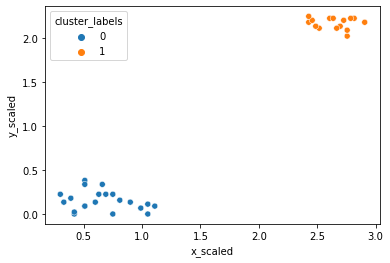

In [12]:
# Import random class
from numpy import random

# Initialize seed
random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

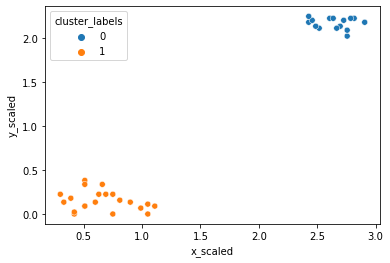

In [13]:
# Import random class
from numpy import random

# Initialize seed
random.seed([1,2, 1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

### Uniform clustering patterns

Now that you are familiar with the impact of seeds, let us look at the bias in k-means clustering towards the formation of uniform clusters.

Let us use a mouse-like dataset for our next exercise. A mouse-like dataset is a group of points that resemble the head of a mouse: it has three clusters of points arranged in circles, one each for the face and two ears of a mouse.

Here is how a typical mouse-like dataset looks like (Source).

![image](https://assets.datacamp.com/production/repositories/3842/datasets/fa03a65258018a0c945528a987cdd250010de1ee/Clustering-results-for-the-Mouse-data-set-where-the-black-boxes-represent-the-centroids.ppm)

The data is stored in a pandas DataFrame, `mouse`. `x_scaled` and `y_scaled` are the column names of the standardized X and Y coordinates of the data points.

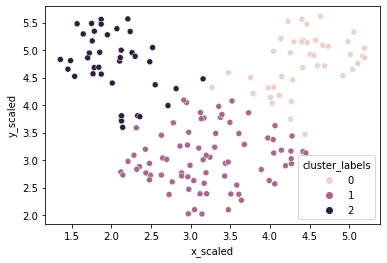

In [14]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

mouse_scaled = mouse[['x_scaled', 'y_scaled']]

# Generate cluster centers
cluster_centers, distortion = kmeans(mouse_scaled, 3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse_scaled, cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = mouse)
plt.show()

### FIFA 18: defenders revisited

In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

    defending: a number which signifies the defending attributes of a player
    physical: a number which signifies the physical attributes of a player

These are typically defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.

The following modules have been pre-loaded: `kmeans`, `vq` from `scipy.cluster.vq`, `matplotlib.pyplot` as `plt`, `seaborn` as `sn`s. The data for this exercise is stored in a pandas DataFrame, `fifa`. The scaled variables are `scaled_def` and `scaled_phy`.

In [20]:
# loading needed dataset.
fifa = pd.read_csv('../datasets/fifa2.csv')

                scaled_def  scaled_phy
cluster_labels                        
0                 3.743692    8.867419
1                 1.865936    7.082691
2                 2.096297    8.944870


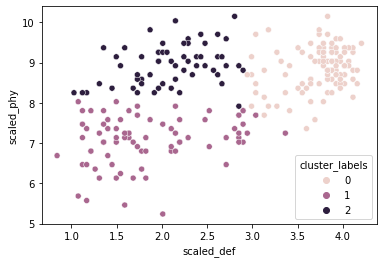

In [21]:
# Set up a random seed in numpy
random.seed([1000,2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers 
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)
plt.show()